In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
from joblib import dump,load

In [3]:
pd.read_csv('/content/drive/My Drive/Sudheer Projects/phd/final_submission.csv')

,id,yield
0,0,0.000000
1,1,47.553911
2,2,2.949348
3,3,0.000000
4,4,62.214539
...,...,...
20848795,41696845,0.547335
20848796,41696846,244.282582
20848797,41696847,255.087500
20848798,41696848,0.000110


In [0]:
test_pedictions_2017=pd.merge(pd.read_csv('/content/drive/My Drive/Sudheer Projects/phd/test_data.csv'),pd.read_csv('/content/drive/My Drive/Sudheer Projects/phd/final_submission.csv'),on=['id'],how='left')[pd.merge(pd.read_csv('/content/drive/My Drive/Sudheer Projects/phd/test_data.csv'),pd.read_csv('/content/drive/My Drive/Sudheer Projects/phd/final_submission.csv'),on=['id'],how='left')['ingredient_type']=='ing_w']

In [0]:
train_ing_w_data=load('/content/drive/My Drive/Sudheer Projects/phd/Pure_code/train_data_Trainfull.joblib')[load('/content/drive/My Drive/Sudheer Projects/phd/Pure_code/train_data_Trainfull.joblib')['ingredient_type']=='ing_w']

In [0]:
test_pedictions_2017.drop(['id','ingredient_type','farm_id'],axis=1,inplace=True)

In [0]:
train_ing_w_data.drop(['ingredient_type','farm_id'],axis=1,inplace=True)

In [0]:
train_ing_w_data=train_ing_w_data.groupby('date',as_index=False).sum()

In [0]:
test_pedictions_2017=test_pedictions_2017.groupby('date',as_index=False).sum()

In [0]:
train_ing_w_data['date']=train_ing_w_data['date'].astype('datetime64[ns]')
test_pedictions_2017['date']=test_pedictions_2017['date'].astype('datetime64[ns]')

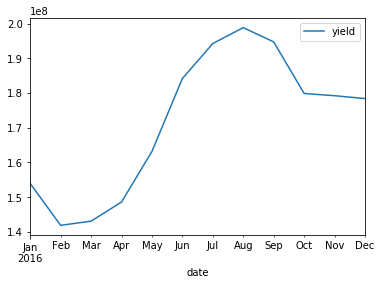

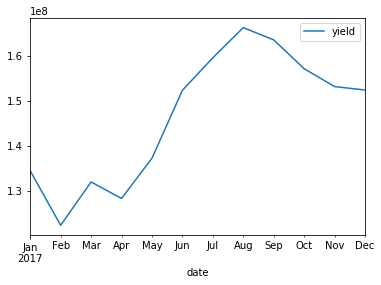

In [25]:
train_ing_w_data.set_index('date').resample('M').sum().plot()
test_pedictions_2017.set_index('date').resample('M').sum().plot()

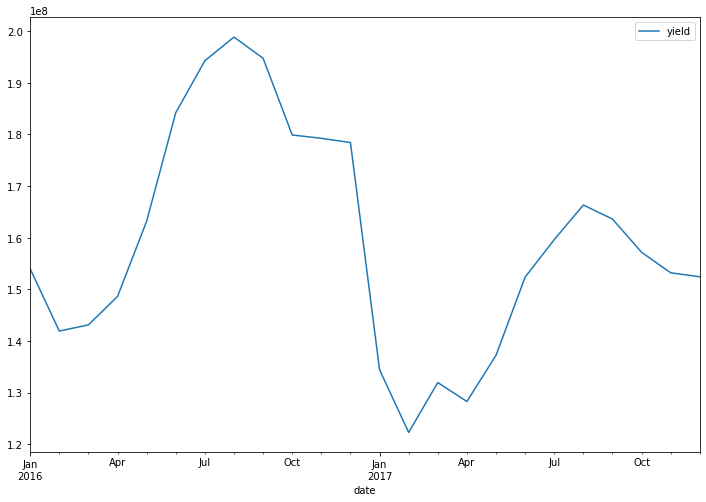

In [36]:
pd.concat([train_ing_w_data,test_pedictions_2017],axis=0).set_index('date').resample('M').sum().plot(figsize=(12,8))

In [34]:
pd.concat([train_ing_w_data,test_pedictions_2017],axis=0)

,date,yield
0,2016-01-01 00:00:00,146796.970800
1,2016-01-01 01:00:00,166439.582600
2,2016-01-01 02:00:00,166652.518400
3,2016-01-01 03:00:00,166988.530800
4,2016-01-01 04:00:00,167381.497000
...,...,...
8755,2017-12-31 19:00:00,192924.331717
8756,2017-12-31 20:00:00,191401.076978
8757,2017-12-31 21:00:00,190163.920732
8758,2017-12-31 22:00:00,189137.710194


In [0]:
demand=pd.read_csv('/content/drive/My Drive/Sudheer Projects/phd/demand.csv')

In [0]:
demand['date']=pd.Series(test_pedictions_2017.set_index('date').resample('M').sum().index)

In [0]:
supply=pd.concat([train_ing_w_data,test_pedictions_2017],axis=0).set_index('date').resample('M').sum()

In [0]:
analysis=pd.merge(supply,demand,on=['date'],how='left').fillna(0)

In [116]:
analysis.columns

Index(['yield', 'demand '], dtype='object')

In [0]:
new_analysis=pd.DataFrame(columns=['date','supply_yield','demand_yield'])
new_analysis['date']=pd.Series(analysis.index)
new_analysis['supply_yield']=pd.Series(analysis['yield'].values)
new_analysis['demand_yield']=pd.Series(analysis['demand\xa0'].values)


In [122]:
new_analysis.dtypes

date            datetime64[ns]
supply_yield           float64
demand_yield            object
dtype: object

In [135]:
import altair as alt
chart1=alt.Chart(new_analysis).mark_line(color='green').encode(
    x='date:T',
    y='supply_yield:Q'
).properties(width=800,height=300)
chart2=alt.Chart(new_analysis).mark_line(color='red').encode(
    x='date:T',
    y='demand_yield:Q'
).properties(width=800,height=300)
chart1+chart2

alt.LayerChart(...)

In [0]:
new_analysis['demand_yield']=new_analysis['demand_yield'].astype('float64')
new_analysis['difference']=new_analysis['supply_yield']-new_analysis['demand_yield']


In [133]:
new_analysis

,date,supply_yield,demand_yield,difference
0,2016-01-31,1.539509e+08,0.0,1.539509e+08
1,2016-02-29,1.419056e+08,0.0,1.419056e+08
2,2016-03-31,1.431033e+08,0.0,1.431033e+08
3,2016-04-30,1.486034e+08,0.0,1.486034e+08
4,2016-05-31,1.631898e+08,0.0,1.631898e+08
5,2016-06-30,1.841911e+08,0.0,1.841911e+08
6,2016-07-31,1.942665e+08,0.0,1.942665e+08
7,2016-08-31,1.988399e+08,0.0,1.988399e+08
8,2016-09-30,1.947341e+08,0.0,1.947341e+08
9,2016-10-31,1.798800e+08,0.0,1.798800e+08
